In [24]:
import pandas as pd 
import logging
import numpy as np
import os
import pandas as pd
import time
import plotly.express as px
from textblob import TextBlob
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
import nltk
nltk.download('words')
import contractions
from datetime import datetime
from googletrans import Translator
from collections import Counter
from itertools import combinations, combinations_with_replacement, permutations
from textblob.translate import NotTranslated
from pandas_profiling import ProfileReport
import time
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import tensorflow as tf
import transformers
import tqdm
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from google_trans_new import google_translator  
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import model_selection, metrics   
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package words to
[nltk_data]     /Users/celiasagastume/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [25]:
#load data
data = pd.read_csv("./jigsaw-toxic-severity-rating/validation_data.csv")

In [28]:
#view data
data.head(5)

,worker,less_toxic,more_toxic
0,313,This article sucks \n\nwoo woo wooooooo,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...
1,188,"""And yes, people should recognize that but the...",Daphne Guinness \n\nTop of the mornin' my fav...
2,82,"Western Media?\n\nYup, because every crime in...","""Atom you don't believe actual photos of mastu..."
3,347,And you removed it! You numbskull! I don't car...,You seem to have sand in your vagina.\n\nMight...
4,539,smelly vagina \n\nBluerasberry why don't you ...,"hey \n\nway to support nazis, you racist"


In [4]:
#create distinct df's for more toxic and less toxic comments

less_toxic = data.drop('more_toxic', axis=1)
more_toxic = data.drop('less_toxic', axis =1)


In [5]:
#add target column to both 

less_toxic['target'] = 0
more_toxic['target'] = 1

#rename text column for both 

less_toxic = less_toxic.rename(columns={'less_toxic':'text'})
more_toxic = more_toxic.rename(columns={'more_toxic':'text'})

In [6]:
less_toxic.head()

,worker,text,target
0,313,This article sucks \n\nwoo woo wooooooo,0
1,188,"""And yes, people should recognize that but the...",0
2,82,"Western Media?\n\nYup, because every crime in...",0
3,347,And you removed it! You numbskull! I don't car...,0
4,539,smelly vagina \n\nBluerasberry why don't you ...,0


In [7]:
more_toxic.head()

,worker,text,target
0,313,WHAT!!!!!!!!?!?!!?!?!!?!?!?!?!!!!!!!!!!!!!!!!!...,1
1,188,Daphne Guinness \n\nTop of the mornin' my fav...,1
2,82,"""Atom you don't believe actual photos of mastu...",1
3,347,You seem to have sand in your vagina.\n\nMight...,1
4,539,"hey \n\nway to support nazis, you racist",1


In [8]:
#rejoin data 

comments = pd.concat([less_toxic, more_toxic], axis =0)

#randomly reorder

comments = comments.sample(frac=1).reset_index(drop=True)

#create average target score for comments 
comments = comments.groupby('text')['target'].mean().reset_index()

#shape
print(comments.head())

#save comments

comments.to_csv("comments.csv", index=False)

                                                text    target
0  \n\nThe comment directly above this one are fr...  0.666667
1  \n\nwhy should people have to read crap posted...  0.888889
2      \nGo F yourself you cottonheadednittymuggins.  0.666667
3  \nU POUR ADMIN, U UPDATE VANDAL COUNT, WHILE R...  0.000000
4   \n\n koreans claim  \n\ni see youve seen the ...  0.333333


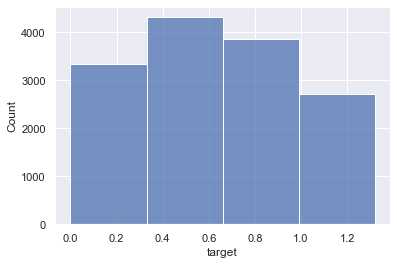

In [9]:
#histogram of toxic values per comment 
%matplotlib inline
sns.histplot(data=comments, x="target", binwidth=.33)
plt.show()

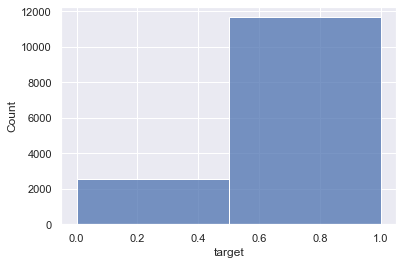

In [10]:
# #remap target values 

comments['target'] = (comments['target'] > 0) * 1

#histogram of toxic values per comment 
%matplotlib inline
sns.histplot(data=comments, x="target", binwidth=.5)
plt.show()

# print(comments['target'].value_counts())

In [11]:
#create text clean + tokenizer function

punc = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~__'
words = set(nltk.corpus.words.words())
stop = stopwords.words('english')
stemmer = SnowballStemmer(language='english')
cv_tfidf = TfidfVectorizer(preprocessor=' '.join)





def to_token(text):
    
    
    text = [text.translate(str.maketrans('', '', string.punctuation))]
    text = [word_tokenize(word) for word in text]
    text = [item for sublist in text for item in sublist]
    text = [stemmer.stem(word) for word in text]
    text = [re.sub(r'http\S+', '', each) for each in text]
    text = [re.sub('[0-9+]', '', each) for each in text]
    text = [re.sub('_', '', each) for each in text]
    text = [re.sub("\n","",each) for each in text]
    text = [re.sub('/_/g', '', each) for each in text]
    text = [re.sub('[^\u0000-\u05C0\u2100-\u214F]+', '', each) for each in text]
    text = [re.sub('[\u0401\u0451\u0410-\u044f]', '', each) for each in text]
    text = [word for word in text if word not in stop]
    text = [word.lower() for word in text]
    text = ["".join(dict.fromkeys(word)) for word in text]

    

    return text

In [12]:
#split data into train and test sets

X, y = comments['text'], comments['target']
print(X.shape, y.shape)

(14251,) (14251,)


In [13]:
#create series of all unique comments in the dataset

corpus = [word for word in X]


# #tokenize train and test sets 

features = [to_token(comment) for comment in corpus]


In [14]:
#partition data into test data 

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = .2, random_state = 33)



In [36]:

def run_training(X_train,y_train,model):
    
    #length of training set   
    data_length= len(X_train)
    
    # prepare the cross-validation procedure
    cv = KFold(n_splits=5, random_state=33, shuffle=True)
    
    #create the model
    if model == 'Extra Trees':
        clf_model = ExtraTreesClassifier(n_estimators=1000, random_state=33)
    elif model == 'Random Forest':
        clf_model = RandomForestClassifier(n_estimators=1000, random_state=33)
    elif model == 'Logistic Regression':
        clf_model = LogisticRegression(max_iter=10000, solver = 'lbfgs',random_state=33)
       
    
    elif model == 'Bayes':
        clf_model = GaussianNB()
    elif model == 'XGBoost':
        clf_model = XGBClassifier(use_label_encoder=False, verbosity=0)
        
  
    
    #make pipeline 
    clf = Pipeline(steps=[('tfidf', TfidfVectorizer(preprocessor=' '.join)),
                          ('svd', TruncatedSVD(n_components=25, random_state=33)), 
                          ('scaler', StandardScaler()),
                          ('classifier', clf_model)])
    
    scoring = ['roc_auc','accuracy','precision', 'recall', 'f1']
  
    # evaluate model
    scores = cross_validate(clf, X_train, y_train, 
                            scoring=scoring, 
                            cv=cv, n_jobs=-1)

  
    

    
    print("The ROC AUC for each fold are: "+str(scores['test_roc_auc']),
        "The Accuracy Scores for each fold are: "+str(scores['test_accuracy']),
          "\nThe Precision Sores for each fold are: "+str(scores['test_precision']),
          "\nThe Recall Sores for each fold are: "+str(scores['test_recall']),
          "\nThe F1 Sores for each fold are: "+str(scores['test_f1'])
          
         )
    #create df of results 
    df = pd.DataFrame(scores)
    df['model'] = model
    
    #reorder columns
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    
    
    return df

In [37]:
#train extra trees

train_1 = run_training(X_train,y_train,'Extra Trees')
train_1

The ROC AUC for each fold are: [0.62608444 0.62201567 0.63333949 0.63420063 0.61222121] The Accuracy Scores for each fold are: [0.82149123 0.80833333 0.81973684 0.81447368 0.81535088] 
The Precision Sores for each fold are: [0.82602922 0.81175431 0.82308713 0.818786   0.81858407] 
The Recall Sores for each fold are: [0.99255319 0.99404762 0.99412393 0.9924812  0.9940892 ] 
The F1 Sores for each fold are: [0.90166707 0.89369983 0.9005565  0.89730517 0.89784033]


,model,fit_time,score_time,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
0,Extra Trees,12.523971,3.311186,0.626084,0.821491,0.826029,0.992553,0.901667
1,Extra Trees,12.655240,2.987499,0.622016,0.808333,0.811754,0.994048,0.893700
2,Extra Trees,12.592555,2.833946,0.633339,0.819737,0.823087,0.994124,0.900556
3,Extra Trees,12.845419,2.794097,0.634201,0.814474,0.818786,0.992481,0.897305
4,Extra Trees,12.567164,3.042506,0.612221,0.815351,0.818584,0.994089,0.897840


In [38]:
#train random forest 
train_2 = run_training(X_train,y_train, 'Random Forest')
train_2

The ROC AUC for each fold are: [0.62443285 0.61370839 0.61979429 0.64381819 0.61100738] The Accuracy Scores for each fold are: [0.82192982 0.80833333 0.82061404 0.81315789 0.81491228] 
The Precision Sores for each fold are: [0.82553004 0.81147903 0.82352941 0.81798051 0.81850376] 
The Recall Sores for each fold are: [0.99414894 0.99458874 0.99465812 0.99194415 0.99355185] 
The F1 Sores for each fold are: [0.90202703 0.89375152 0.90104041 0.89660194 0.89757282]


,model,fit_time,score_time,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
0,Random Forest,51.164236,1.247156,0.624433,0.821930,0.825530,0.994149,0.902027
1,Random Forest,50.688422,1.145117,0.613708,0.808333,0.811479,0.994589,0.893752
2,Random Forest,50.994684,1.240353,0.619794,0.820614,0.823529,0.994658,0.901040
3,Random Forest,53.279548,1.071846,0.643818,0.813158,0.817981,0.991944,0.896602
4,Random Forest,51.789082,1.212088,0.611007,0.814912,0.818504,0.993552,0.897573


In [39]:
#train logistic regression
train_3 = run_training(X_train, y_train, 'Logistic Regression')
train_3

The ROC AUC for each fold are: [0.64947872 0.6423204  0.65845483 0.66471202 0.62020765] The Accuracy Scores for each fold are: [0.82368421 0.80877193 0.82149123 0.81535088 0.81666667] 
The Precision Sores for each fold are: [0.82440737 0.81019332 0.82226133 0.81726112 0.81770145] 
The Recall Sores for each fold are: [0.99893617 0.9978355  0.99839744 0.99677766 0.99785062] 
The F1 Sores for each fold are: [0.9033189  0.8942774  0.90180941 0.89813695 0.89883833]


,model,fit_time,score_time,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
0,Logistic Regression,0.670115,0.165882,0.649479,0.823684,0.824407,0.998936,0.903319
1,Logistic Regression,0.656473,0.194878,0.642320,0.808772,0.810193,0.997835,0.894277
2,Logistic Regression,0.538724,0.130513,0.658455,0.821491,0.822261,0.998397,0.901809
3,Logistic Regression,0.684591,0.156641,0.664712,0.815351,0.817261,0.996778,0.898137
4,Logistic Regression,0.683455,0.144451,0.620208,0.816667,0.817701,0.997851,0.898838


In [40]:
#train bayes
train_4= run_training(X_train, y_train, 'Bayes')
train_4

The ROC AUC for each fold are: [0.62123404 0.60158442 0.61627035 0.62721825 0.60797182] The Accuracy Scores for each fold are: [0.47938596 0.47236842 0.48815789 0.52324561 0.49692982] 
The Precision Sores for each fold are: [0.87138264 0.85714286 0.87222809 0.88027478 0.88059701] 
The Recall Sores for each fold are: [0.43244681 0.41883117 0.44123932 0.48174006 0.44384739] 
The F1 Sores for each fold are: [0.57803057 0.56270447 0.58602341 0.62270045 0.59021079]


,model,fit_time,score_time,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
0,Bayes,0.681202,0.192129,0.621234,0.479386,0.871383,0.432447,0.578031
1,Bayes,0.730559,0.196256,0.601584,0.472368,0.857143,0.418831,0.562704
2,Bayes,0.740344,0.169246,0.616270,0.488158,0.872228,0.441239,0.586023
3,Bayes,0.545424,0.149109,0.627218,0.523246,0.880275,0.481740,0.622700
4,Bayes,0.544362,0.142250,0.607972,0.496930,0.880597,0.443847,0.590211


In [41]:
#train xgboost
train_5 = run_training(X_train, y_train ,'XGBoost')
train_5

The ROC AUC for each fold are: [0.5990871  0.60253139 0.64147473 0.63065901 0.59061261] The Accuracy Scores for each fold are: [0.80877193 0.80175439 0.80964912 0.80350877 0.80175439] 
The Precision Sores for each fold are: [0.82937956 0.81872146 0.82592928 0.821949   0.82095672] 
The Recall Sores for each fold are: [0.96702128 0.9702381  0.9732906  0.96938776 0.96829661] 
The F1 Sores for each fold are: [0.89292731 0.8880634  0.89357528 0.88960079 0.88856016]


,model,fit_time,score_time,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
0,XGBoost,6.693684,0.225169,0.599087,0.808772,0.829380,0.967021,0.892927
1,XGBoost,6.603507,0.266842,0.602531,0.801754,0.818721,0.970238,0.888063
2,XGBoost,6.602714,0.256938,0.641475,0.809649,0.825929,0.973291,0.893575
3,XGBoost,6.667840,0.237349,0.630659,0.803509,0.821949,0.969388,0.889601
4,XGBoost,6.846824,0.221369,0.590613,0.801754,0.820957,0.968297,0.888560


In [42]:
#create results df
frames = [train_1, train_2,train_3,train_4,train_5]
train_results = pd.concat(frames)

#create average results df 
train_average=train_results.groupby('model')[['test_roc_auc','test_accuracy','test_precision','test_recall', 'test_f1']].mean().reset_index()

train_average

,model,test_roc_auc,test_accuracy,test_precision,test_recall,test_f1
0,Bayes,0.614856,0.492018,0.872325,0.443621,0.587934
1,Extra Trees,0.625572,0.815877,0.819648,0.993459,0.898214
2,Logistic Regression,0.647035,0.817193,0.818365,0.997959,0.899276
3,Random Forest,0.622552,0.815789,0.819405,0.993778,0.898199
4,XGBoost,0.612873,0.805088,0.823387,0.969647,0.890545


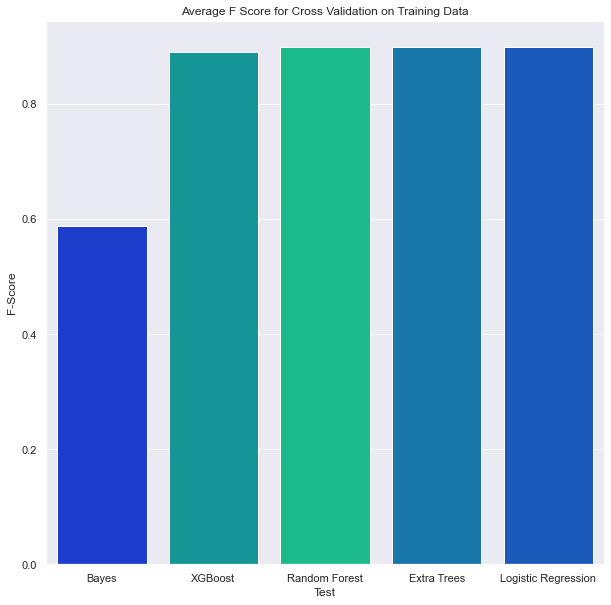

In [43]:
#plot the F1 Score Average

#color scheme
pal = sns.color_palette("winter_r", (len(train_average)))
rank = train_average["test_f1"].argsort().argsort() 

#sort the df by f1
train_average = train_average.sort_values('test_f1')

#plot the data
sns.barplot(x=train_average.model, y= train_average.test_f1, palette=np.array(pal[::-1])[rank])

#titles
plt.xlabel("Test")
plt.ylabel("F-Score")
plt.title("Average F Score for Cross Validation on Training Data")


#save the plot 
plt.savefig('F_score_cv.png', dpi=400)


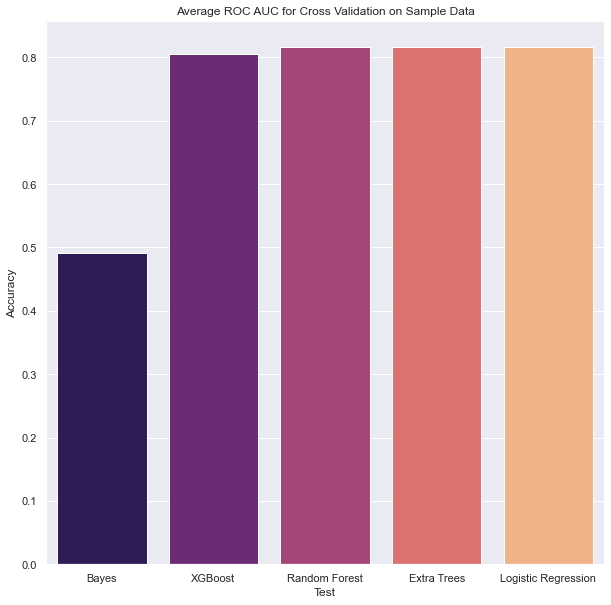

In [44]:
#plot the Accuracy Average

#color scheme
pal = sns.color_palette("magma_r", (len(train_average)))
rank = train_average["test_accuracy"].argsort().argsort() 

#sort the df by f1
train_average = train_average.sort_values('test_accuracy')

#plot the data
sns.barplot(x=train_average.model, y= train_average.test_accuracy, palette=np.array(pal[::-1])[rank])

#titles
plt.xlabel("Test")
plt.ylabel("Accuracy")
plt.title("Average ROC AUC for Cross Validation on Sample Data")


#save the plot 
plt.savefig('Accuracy_score_cv.png', dpi=400)

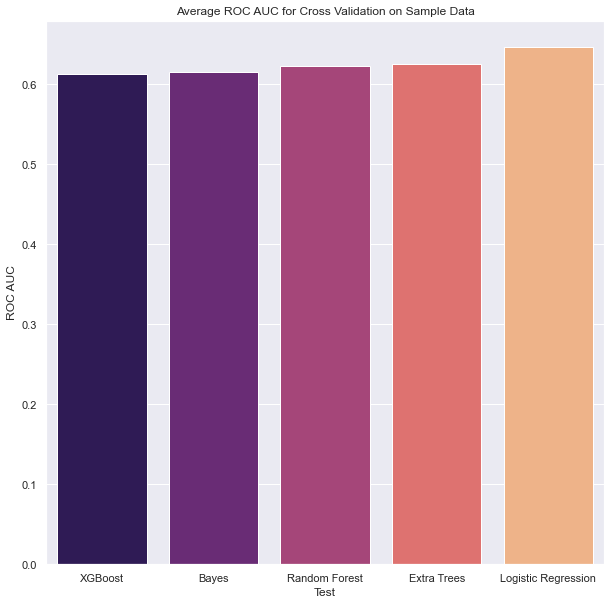

In [47]:
#plot the ROC AUC

#color scheme
pal = sns.color_palette("magma_r", (len(train_average)))
rank = train_average["test_roc_auc"].argsort().argsort() 

#sort the df by f1
train_average = train_average.sort_values('test_roc_auc')

#plot the data
sns.barplot(x=train_average.model, y= train_average.test_roc_auc, palette=np.array(pal[::-1])[rank])

#titles
plt.xlabel("Test")
plt.ylabel("ROC AUC")
plt.title("Average ROC AUC for Cross Validation on Sample Data")


#save the plot 
plt.savefig('rocauc_score_cv.png', dpi=400)